## PAIR PROGRAMMING ESTISTICA III
---

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Los objetivos de hoy son:


**EJERCICIO1**

Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

In [6]:
# Importamos las librerias

import numpy as np
from scipy import stats as st
from scipy.stats import skew
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data


In [7]:
# Para visualizar todas las columnas

pd.options.display.max_columns = None

In [9]:
# Cargamos y abrimos el archivo

df = pd.read_csv('cost_of_living2.csv', index_col= 0)
df.head()


,indice,ciudad,pais,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,coke_rest_0.33cl,agua_rest_0.33cl,leche_1l,barra_pan,arroz_1kg,huevos_12ud,queso_1kg,pollo_1kg,ternera_1kg,manzanas_1kg,platanos_1kg,orange_1kg,tomates_1kg,patatas_1kg,cebollas_1kg,lechuga,agua_super_1.5l,botella_vino_super,cerveza_nac_super_0.5cl,cerveza_imp_super_0.33cl,tabaco_paq_20ud,billete_transporte_pub,abono_transporte_pub,taxi_start,taxi_1km,taxi_1h,gasolina_1l,volkswagen_coche_nuevo,toyota_coche_nuevo,gastos_basicos_apartamento,precio_movil_1min,internet_mensual,cuota_gym,alq_pista_tenis,entrada_cine,guarderia_mensual,colegio_anual,vaqueros_levis,vestido_verano,deportivas_nike,zapatos_cuero_homb,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.70,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.90,73.76,1985.70,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,2.68,2.57,1.18,2.17,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,0.82,0.62,13.97,0.91,1.93,3.49,0.56,27.94,2.10,0.42,8.38,1.17,19554.98,20360.82,64.76,0.03,16.74,63.23,14.67,8.38,1356.63,25883.49,69.17,34.26,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,1.28,1.21,0.83,1.70,6.66,3.46,8.32,2.80,1.52,2.08,1.24,1.35,2.10,1.13,0.42,20.66,2.06,3.18,2.22,0.22,9.53,0.41,0.29,2.86,0.79,25489.74,27978.73,80.12,0.11,30.45,30.86,11.71,3.18,132.74,9934.37,38.87,25.95,72.89,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,1.63,1.19,0.89,1.73,5.06,4.19,6.64,2.66,1.42,2.95,1.42,1.76,1.75,1.36,0.65,8.84,1.15,1.55,2.65,0.53,11.86,0.71,0.24,2.12,1.38,22984.03,18200.60,97.45,0.15,38.02,48.09,5.85,5.48,254.89,10860.59,38.45,26.96,69.47,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,2.13,2.78,3.66,4.02,11.13,10.62,40.41,6.79,3.70,6.40,6.36,3.86,2.81,2.40,1.06,15.08,2.10,2.49,3.39,0.98,41.47,2.86,0.90,9.05,1.41,28648.67,26851.06,176.24,0.16,22.06,54.84,17.99,9.42,384.01,18283.99,56.99,45.49,70.21,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


- Tabla de contingencia

In [10]:
minimo_salario = df['media_pond_salario_neto'].min()
minimo_salario



18.0

In [11]:
maximo_salario = df['media_pond_salario_neto'].max()
maximo_salario

12681.26

In [14]:
# Elegimos el salario y lo cambiamos a variable categórica

# definimos la función
def cambiar_sueldos(col):
    if col < 500:
        return "bajo"
    elif col > 500 and col <= 2000:
        return "medio"
    else:
        return "alto"



df["cat_salario"] = df["media_pond_salario_neto"].apply(cambiar_sueldos)



In [15]:
df['cat_salario'].value_counts()

alto     2781
medio    1178
bajo      915
Name: cat_salario, dtype: int64

In [ ]:
df.head()

,indice,city,country,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,coke_rest_0.33cl,agua_rest_0.33cl,leche_1l,barra_pan,arroz_1kg,huevos_12ud,queso_1kg,pollo_1kg,ternera_1kg,manzanas_1kg,platanos_1kg,orange_1kg,tomates_1kg,patatas_1kg,cebollas_1kg,lechuga,agua_super_1.5l,botella_vino_super,cerveza_nac_super_0.5cl,cerveza_imp_super_0.33cl,tabaco_paq_20ud,billete_transporte_pub,abono_transporte_pub,taxi_start,taxi_1km,taxi_1h,gasolina_1l,volkswagen_coche_nuevo,toyota_coche_nuevo,gastos_basicos_apartamento,precio_movil_1min,internet_mensual,cuota_gym,alq_pista_tenis,entrada_cine,guarderia_mensual,colegio_anual,vaqueros_levis,vestido_verano,deportivas_nike,zapatos_cuero_homb,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality,cat_salario
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.70,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.90,73.76,1985.70,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1,medio
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,2.68,2.57,1.18,2.17,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,0.82,0.62,13.97,0.91,1.93,3.49,0.56,27.94,2.10,0.42,8.38,1.17,19554.98,20360.82,64.76,0.03,16.74,63.23,14.67,8.38,1356.63,25883.49,69.17,34.26,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1,alto
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,1.28,1.21,0.83,1.70,6.66,3.46,8.32,2.80,1.52,2.08,1.24,1.35,2.10,1.13,0.42,20.66,2.06,3.18,2.22,0.22,9.53,0.41,0.29,2.86,0.79,25489.74,27978.73,80.12,0.11,30.45,30.86,11.71,3.18,132.74,9934.37,38.87,25.95,72.89,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1,bajo
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,1.63,1.19,0.89,1.73,5.06,4.19,6.64,2.66,1.42,2.95,1.42,1.76,1.75,1.36,0.65,8.84,1.15,1.55,2.65,0.53,11.86,0.71,0.24,2.12,1.38,22984.03,18200.60,97.45,0.15,38.02,48.09,5.85,5.48,254.89,10860.59,38.45,26.96,69.47,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1,bajo
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,2.13,2.78,3.66,4.02,11.13,10.62,40.41,6.79,3.70,6.40,6.36,3.86,2.81,2.40,1.06,15.08,2.10,2.49,3.39,0.98,41.47,2.86,0.90,9.05,1.41,28648.67,26851.06,176.24,0.16,22.06,54.84,17.99,9.42,384.01,18283.99,56.99,45.49,70.21,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1,alto


In [ ]:
# Para visualizar todas las filas
# pd.options.display.max_rows = None 

In [17]:
df_crosstab = pd.crosstab(df['pais'], 
                            df['cat_salario']) 
df_crosstab

cat_salario,alto,bajo,medio
pais,,,
Afghanistan,3,3,0
Albania,3,11,1
Algeria,4,29,0
American Samoa,1,0,0
Andorra,3,0,0
...,...,...,...
Venezuela,10,8,0
Vietnam,9,9,3
Yemen,5,1,1


- Coeficiente de correlación de las variables numéricas del dataset.

In [18]:
df.head(2)

,indice,ciudad,pais,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,coke_rest_0.33cl,agua_rest_0.33cl,leche_1l,barra_pan,arroz_1kg,huevos_12ud,queso_1kg,pollo_1kg,ternera_1kg,manzanas_1kg,platanos_1kg,orange_1kg,tomates_1kg,patatas_1kg,cebollas_1kg,lechuga,agua_super_1.5l,botella_vino_super,cerveza_nac_super_0.5cl,cerveza_imp_super_0.33cl,tabaco_paq_20ud,billete_transporte_pub,abono_transporte_pub,taxi_start,taxi_1km,taxi_1h,gasolina_1l,volkswagen_coche_nuevo,toyota_coche_nuevo,gastos_basicos_apartamento,precio_movil_1min,internet_mensual,cuota_gym,alq_pista_tenis,entrada_cine,guarderia_mensual,colegio_anual,vaqueros_levis,vestido_verano,deportivas_nike,zapatos_cuero_homb,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality,cat_salario
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.70,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.90,73.76,1985.70,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1,medio
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,2.68,2.57,1.18,2.17,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,0.82,0.62,13.97,0.91,1.93,3.49,0.56,27.94,2.10,0.42,8.38,1.17,19554.98,20360.82,64.76,0.03,16.74,63.23,14.67,8.38,1356.63,25883.49,69.17,34.26,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1,medio


In [19]:
# calculamos la matriz de correlación de dos variables numéricas de nuestro df
matriz_gastos_salario = df[['gastos_basicos_apartamento', 'media_pond_salario_neto']].corr()
matriz_gastos_salario

,gastos_basicos_apartamento,media_pond_salario_neto
gastos_basicos_apartamento,1.000000,0.486977
media_pond_salario_neto,0.486977,1.000000


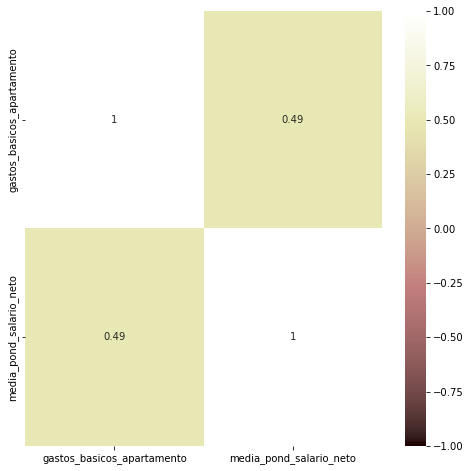

In [20]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (8,8))

# creamos la gráfica
sns.heatmap(df[['gastos_basicos_apartamento', 'media_pond_salario_neto']].corr(),
            cmap = "pink", 
            annot = True, 
            vmin = -1, 
            vmax = 1 );

- Sesgos de alguna de las variables numéricas del dataset.

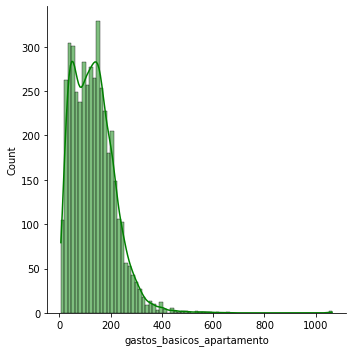

In [25]:
sns.displot(df["gastos_basicos_apartamento"], 
            color = "green", 
            kde = True);

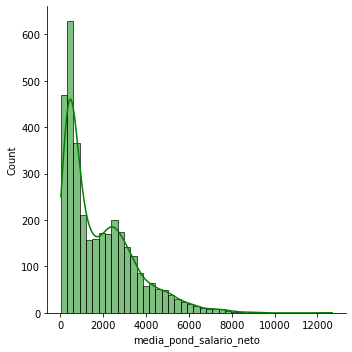

In [26]:
sns.displot(df["media_pond_salario_neto"], 
            color = "green", 
            kde = True);

- Intervalo de confianza de algunas de las variables numéricas del dataset

In [21]:
datos = df['gastos_basicos_apartamento']

print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos)))

print(np.mean(datos))

(131.69239453166153, 135.61329637742938)
133.65284545454546


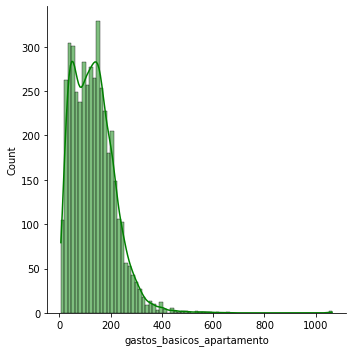

---

**EJERCICIO 2**

Interpretación de los resultados.

- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos

En la **tabla de contingencia** dividimos los sueldos en bajo, medio y alto, siendo la media de los salarios obtenida en los cálculos estadísticos de la muestra de datos la que nos guíe para esa división, pudiendo observar que hay mayor cantidad de sueldos altos que bajos, y mayor cantidad también de sueldos altos que medios. Los datos apuntan a que la cantidad de sueldos menores de 500USD no llega a los 1000 registros.
(alto: 2781 | medio: 1178 |bajo:915)



 El **coeficiente de correlación** indica que hay una correlación moderada (0.49) entre el sueldo mensual y los gastos mensuales básicos de un apartamento, al comparar tantos paises diferentes intuimos que perdemos objetividad.



Los **sesgos** de la distribución de datos de las dos variables está sesgado a la derecha, siendo un sesgo positivo.